In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import ComputationalHypergraphDiscovery as CHD
from ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
# load data from file
Ntrain = 2000
df=pd.read_csv('SachsData.csv').sample(Ntrain,random_state=1)


Finding ancestors with kernel [linear]: 100%|██████████| 9/9 [00:26<00:00,  2.93s/it]



Results for $Raf$
Kernel [linear] has n/(n+s)=0.26128262731440677, Z=(1.00, 1.00), gamma=2.53e+01
Kernel [quadratic] has n/(n+s)=0.4357429365769312, Z=(0.99, 1.00), gamma=1.83e+01
$Raf$ has ancestors with the kernel [linear] | (n/(s+n)=0.25 after pruning)


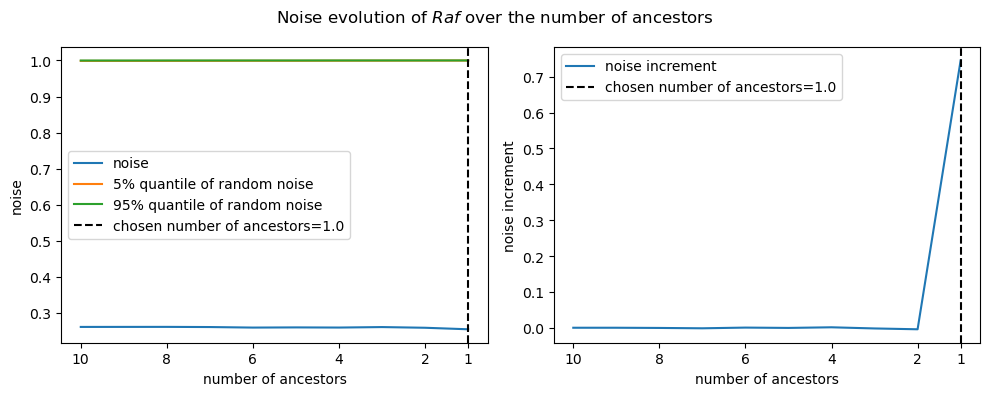

Ancestors of $Raf$: ['$Mek$']


Results for $Mek$
Kernel [linear] has n/(n+s)=0.25292197233769953, Z=(1.00, 1.00), gamma=2.69e+01
Kernel [quadratic] has n/(n+s)=0.40008100166526556, Z=(0.99, 1.00), gamma=1.61e+01
$Mek$ has ancestors with the kernel [linear] | (n/(s+n)=0.25 after pruning)


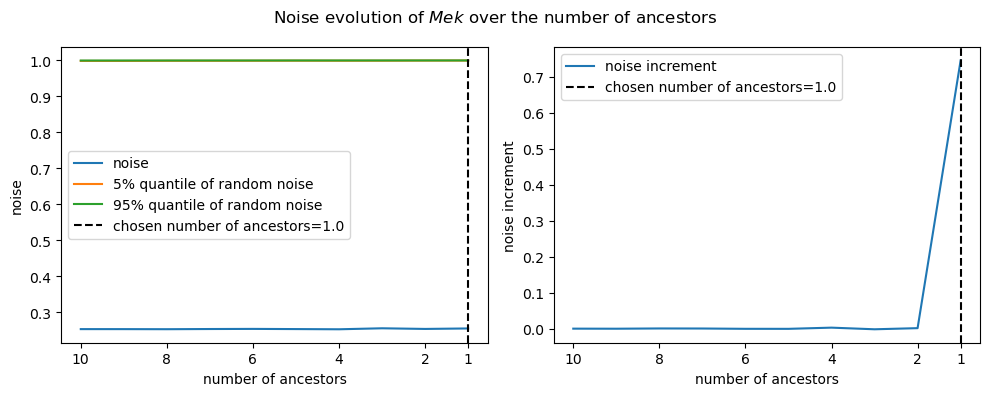

Ancestors of $Mek$: ['$Raf$']


Results for $PIP2$
Kernel [linear] has n/(n+s)=0.6576425086196224, Z=(1.00, 1.00), gamma=8.47e+01
Kernel [quadratic] has n/(n+s)=0.7725832056560193, Z=(1.00, 1.00), gamma=7.79e+03
$PIP2$ has ancestors with the kernel [linear] | (n/(s+n)=0.62 after pruning)


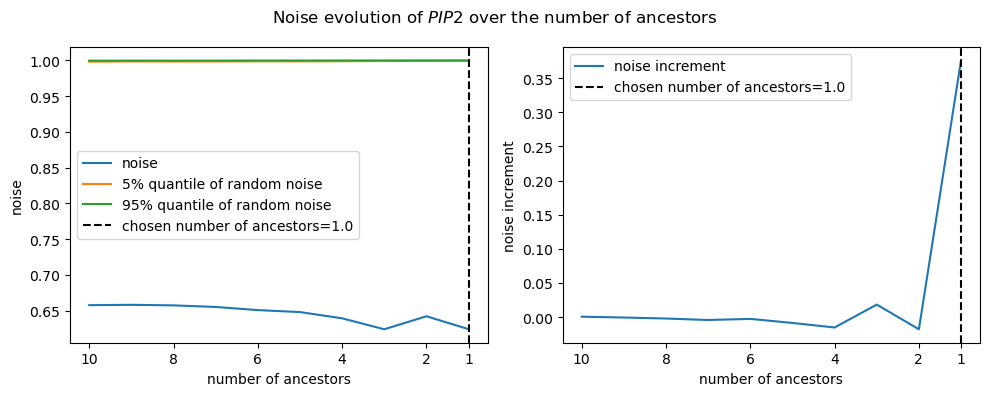

Ancestors of $PIP2$: ['$Plcg$']


Results for $PKC$
Kernel [linear] has n/(n+s)=0.49716258224378357, Z=(1.00, 1.00), gamma=7.93e+01
Kernel [quadratic] has n/(n+s)=0.5500598660480981, Z=(1.00, 1.00), gamma=1.32e+04
$PKC$ has ancestors with the kernel [linear] | (n/(s+n)=0.44 after pruning)


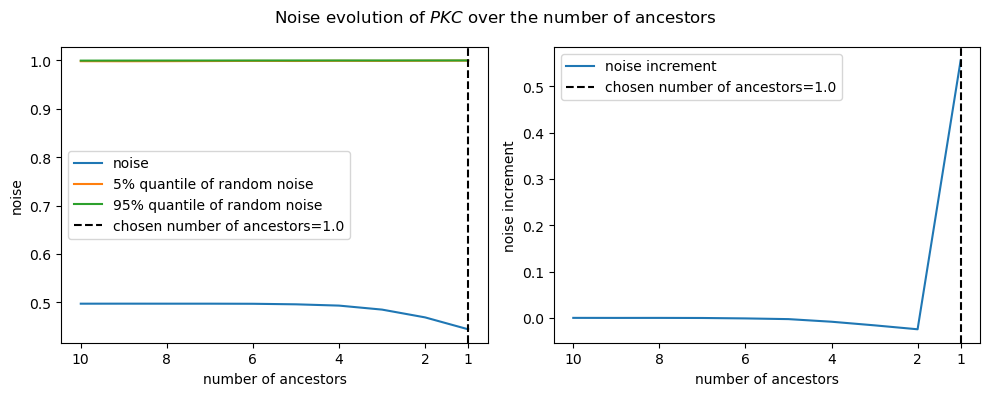

Ancestors of $PKC$: ['$P38$']


Results for $P38$
Kernel [linear] has n/(n+s)=0.5167103171440693, Z=(1.00, 1.00), gamma=9.15e+01
Kernel [quadratic] has n/(n+s)=0.6381796372170622, Z=(1.00, 1.00), gamma=2.50e+04
$P38$ has ancestors with the kernel [linear] | (n/(s+n)=0.44 after pruning)


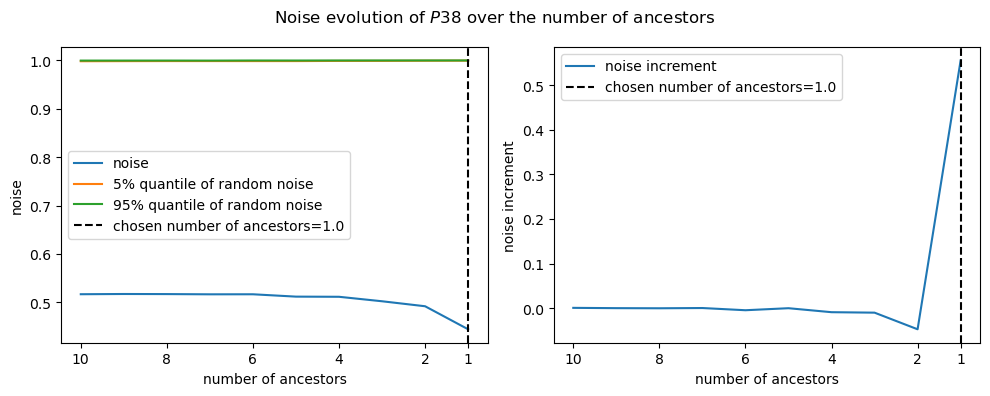

Ancestors of $P38$: ['$PKC$']


Results for $Jnk$
Kernel [linear] has n/(n+s)=0.702067258105492, Z=(1.00, 1.00), gamma=2.65e+02
Kernel [quadratic] has n/(n+s)=0.7905481140489602, Z=(1.00, 1.00), gamma=5.21e+04
$Jnk$ has ancestors with the kernel [linear] | (n/(s+n)=0.71 after pruning)


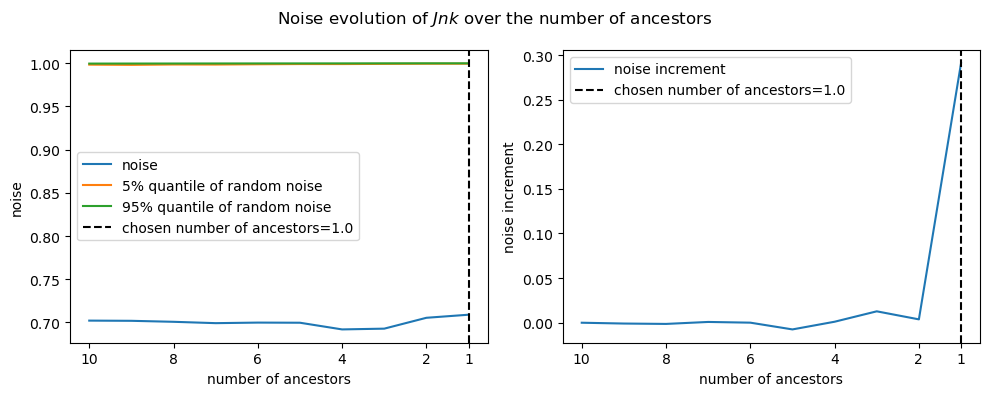

Ancestors of $Jnk$: ['$PKC$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 9/9 [00:23<00:00,  2.59s/it]



Results for $Plcg$
Kernel [linear] has n/(n+s)=0.6401015890665803, Z=(1.00, 1.00), gamma=9.94e+01
Kernel [quadratic] has n/(n+s)=0.5979073933652679, Z=(1.00, 1.00), gamma=1.31e+03
$Plcg$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.63 after pruning)


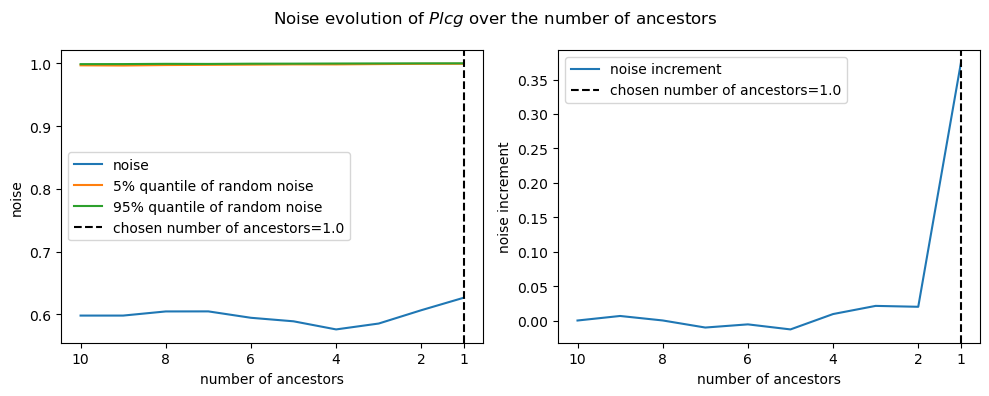

Ancestors of $Plcg$: ['$PIP2$']


Results for $PIP3$
Kernel [linear] has n/(n+s)=0.9806566658698265, Z=(1.00, 1.00), gamma=2.60e+01
Kernel [quadratic] has n/(n+s)=0.9698658634175137, Z=(0.99, 1.00), gamma=3.61e+01
$PIP3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.98 after pruning)


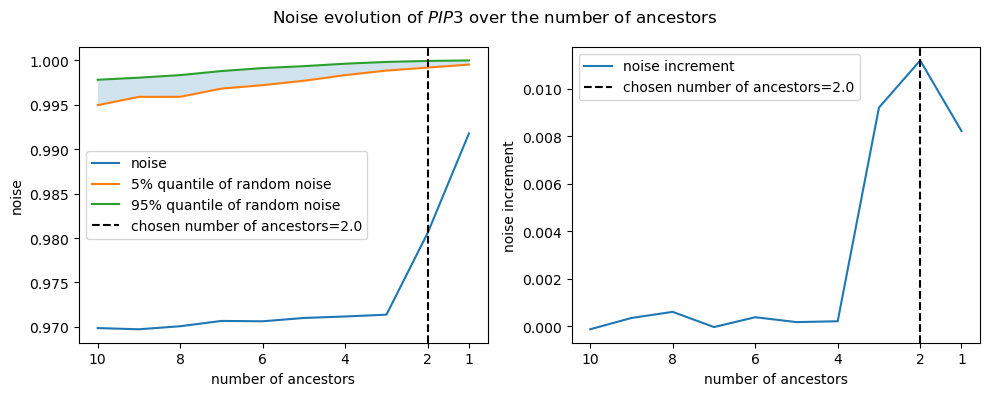

Ancestors of $PIP3$: ['$PIP2$', '$PKA$']


Results for $Erk$
Kernel [linear] has n/(n+s)=0.831195907719922, Z=(1.00, 1.00), gamma=1.02e+02
Kernel [quadratic] has n/(n+s)=0.7780138166971852, Z=(1.00, 1.00), gamma=1.81e+03
$Erk$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.84 after pruning)


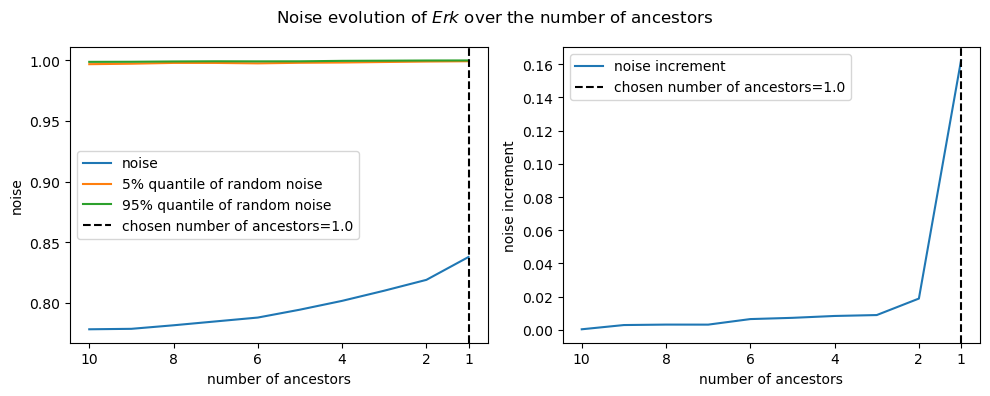

Ancestors of $Erk$: ['$Akt$']


Results for $Akt$
Kernel [linear] has n/(n+s)=0.7608266895218253, Z=(1.00, 1.00), gamma=2.04e+02
Kernel [quadratic] has n/(n+s)=0.6458105661802467, Z=(1.00, 1.00), gamma=2.98e+01
$Akt$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.80 after pruning)


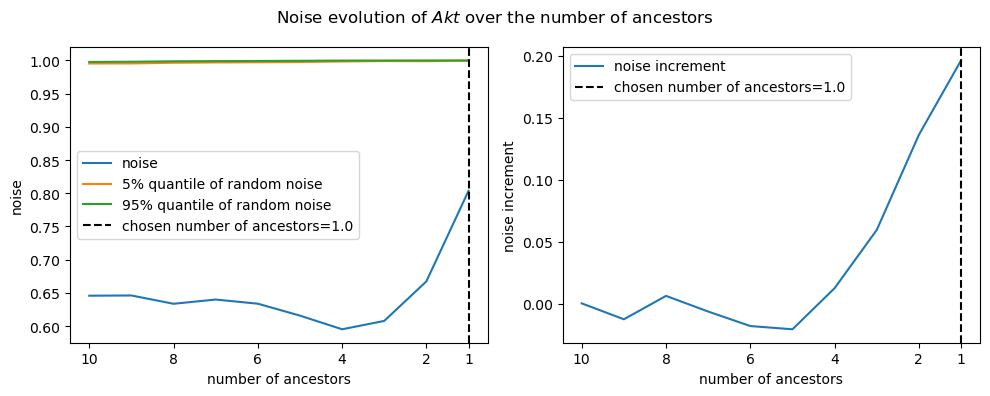

Ancestors of $Akt$: ['$Erk$']


Results for $PKA$
Kernel [linear] has n/(n+s)=0.9722248385047937, Z=(1.00, 1.00), gamma=3.38e+02
Kernel [quadratic] has n/(n+s)=0.9344086390014689, Z=(1.00, 1.00), gamma=5.22e+01
$PKA$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.95 after pruning)


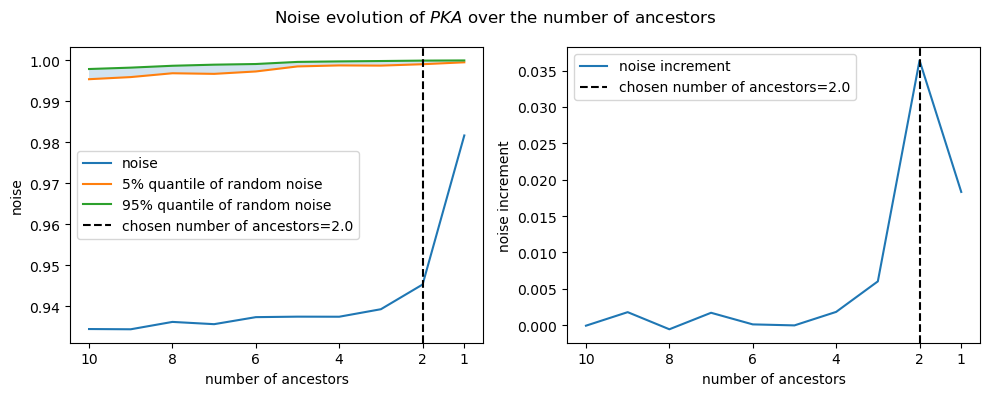

Ancestors of $PKA$: ['$Plcg$', '$Erk$']



In [6]:
graph_discovery = CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=[0.1*LinearMode(),0.1*QuadraticMode()],gamma_min=1e-6)
graph_discovery.fit()

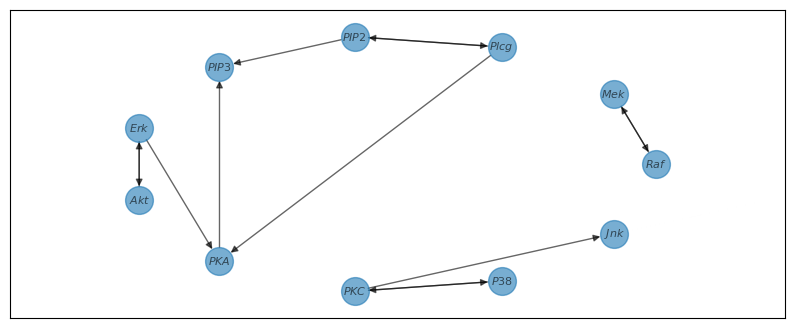

In [7]:
graph_discovery.plot_graph()

# Cluster analysis

In [8]:
clusters = [
    ['$PKC$','$P38$','$Jnk$'],
    ['$Erk$','$Akt$','$PKA$'],
    ['$Raf$','$Mek$'],
    ['$Plcg$','$PIP2$','$PIP3$']
]

graph_discovery_with_clusters = graph_discovery.prepare_new_graph_with_clusters(clusters,kernels=[0.1*LinearMode(),0.1*QuadraticMode(),0.1*GaussianMode(l=1.0)])


Finding ancestors with kernel [linear]: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]



Results for $Raf$
Kernel [linear] has n/(n+s)=0.26128262731440666, Z=(1.00, 1.00), gamma=2.53e+01
Kernel [quadratic] has n/(n+s)=0.43574293657693053, Z=(0.99, 1.00), gamma=1.83e+01
Kernel [gaussian] has n/(n+s)=0.4529534402141702, Z=(0.96, 0.97), gamma=1.34e+02
$Raf$ has ancestors with the kernel [linear] | (n/(s+n)=0.25 after pruning)


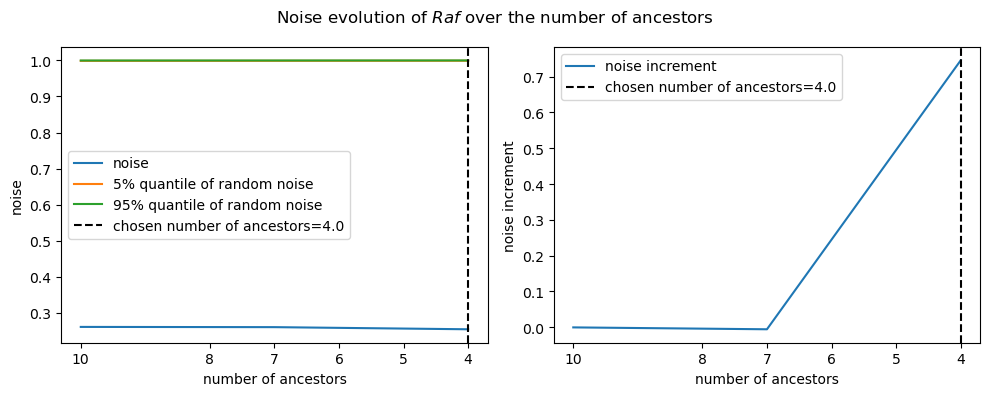

Ancestors of $Raf$: ['$Mek$', '$PKC$', '$P38$', '$Jnk$']


Results for $Mek$
Kernel [linear] has n/(n+s)=0.2529219723376996, Z=(1.00, 1.00), gamma=2.69e+01
Kernel [quadratic] has n/(n+s)=0.4000810016652653, Z=(0.99, 1.00), gamma=1.61e+01
Kernel [gaussian] has n/(n+s)=0.3440476616377554, Z=(0.95, 0.96), gamma=6.64e+01
$Mek$ has ancestors with the kernel [linear] | (n/(s+n)=0.25 after pruning)


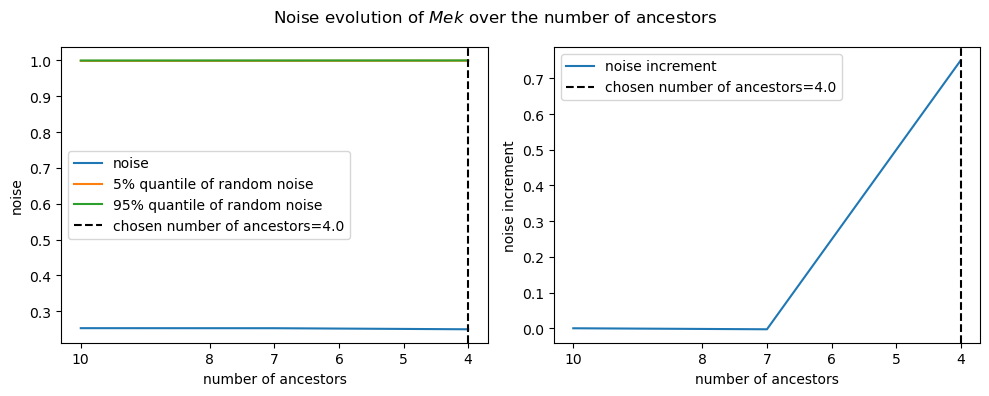

Ancestors of $Mek$: ['$Raf$', '$Erk$', '$Akt$', '$PKA$']


Results for $PIP2$
Kernel [linear] has n/(n+s)=0.6576425086196226, Z=(1.00, 1.00), gamma=8.47e+01
Kernel [quadratic] has n/(n+s)=0.7725832056560196, Z=(1.00, 1.00), gamma=7.79e+03
Kernel [gaussian] has n/(n+s)=0.8360708580402259, Z=(0.89, 0.90), gamma=5.50e-03
$PIP2$ has ancestors with the kernel [linear] | (n/(s+n)=0.63 after pruning)


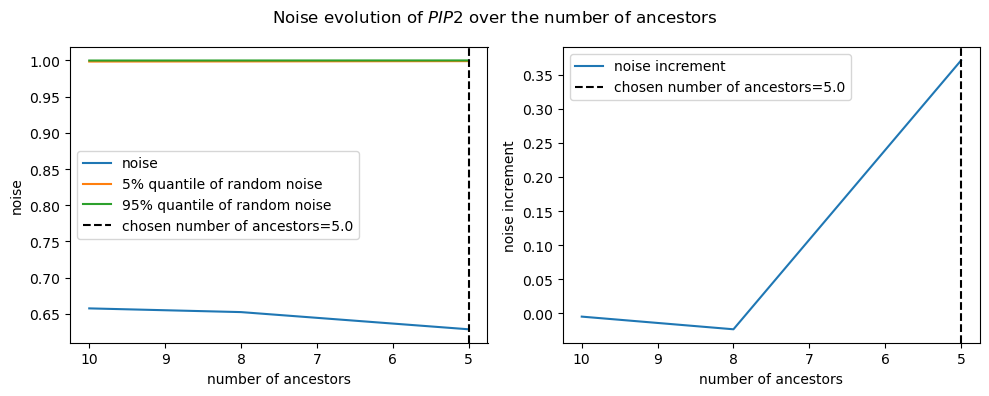

Ancestors of $PIP2$: ['$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$']


Results for $PKC$
Kernel [linear] has n/(n+s)=0.4971625822437837, Z=(1.00, 1.00), gamma=7.93e+01
Kernel [quadratic] has n/(n+s)=0.5500598660480979, Z=(1.00, 1.00), gamma=1.32e+04
Kernel [gaussian] has n/(n+s)=0.8422914940321905, Z=(0.88, 0.90), gamma=1.23e-02
$PKC$ has ancestors with the kernel [linear] | (n/(s+n)=0.49 after pruning)


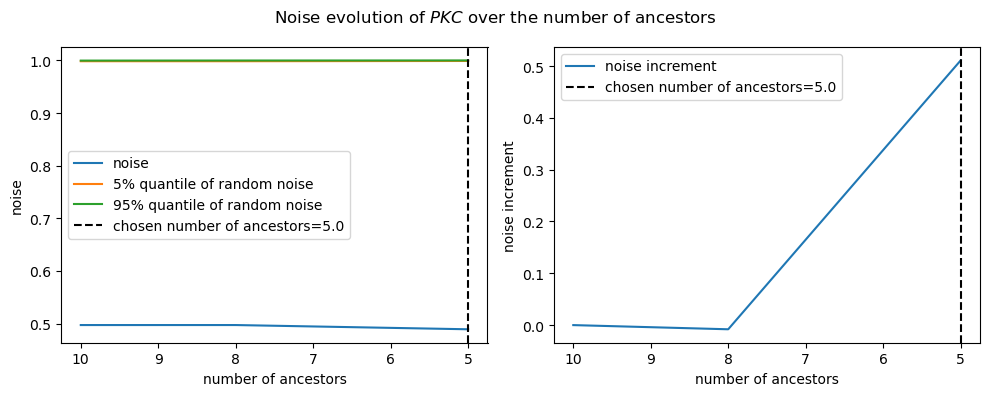

Ancestors of $PKC$: ['$Plcg$', '$PIP2$', '$PIP3$', '$P38$', '$Jnk$']


Results for $P38$
Kernel [linear] has n/(n+s)=0.5167103171440695, Z=(1.00, 1.00), gamma=9.15e+01
Kernel [quadratic] has n/(n+s)=0.6381796372170626, Z=(1.00, 1.00), gamma=2.50e+04
Kernel [gaussian] has n/(n+s)=0.8558751358868355, Z=(0.88, 0.90), gamma=1.66e-02
$P38$ has ancestors with the kernel [linear] | (n/(s+n)=0.50 after pruning)


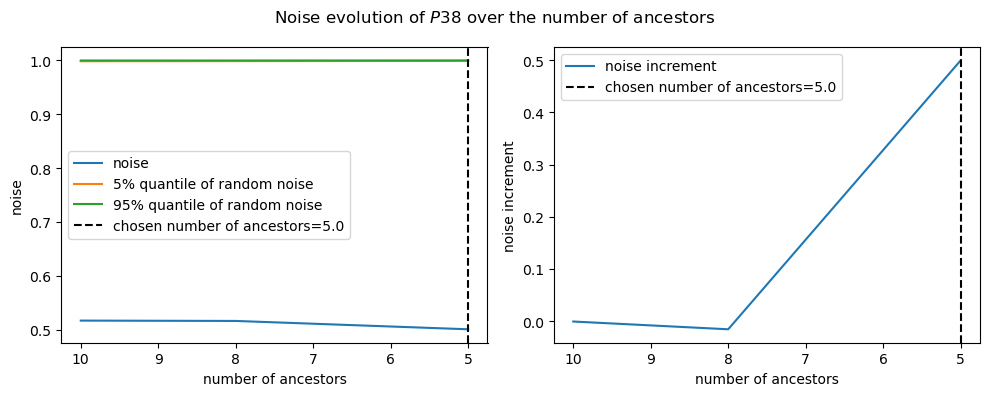

Ancestors of $P38$: ['$Erk$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']


Results for $Jnk$
Kernel [linear] has n/(n+s)=0.7020672581054918, Z=(1.00, 1.00), gamma=2.65e+02
Kernel [quadratic] has n/(n+s)=0.7905481140489605, Z=(1.00, 1.00), gamma=5.21e+04
Kernel [gaussian] has n/(n+s)=0.8263024503013755, Z=(0.88, 0.90), gamma=1.02e-02
$Jnk$ has ancestors with the kernel [linear] | (n/(s+n)=0.70 after pruning)


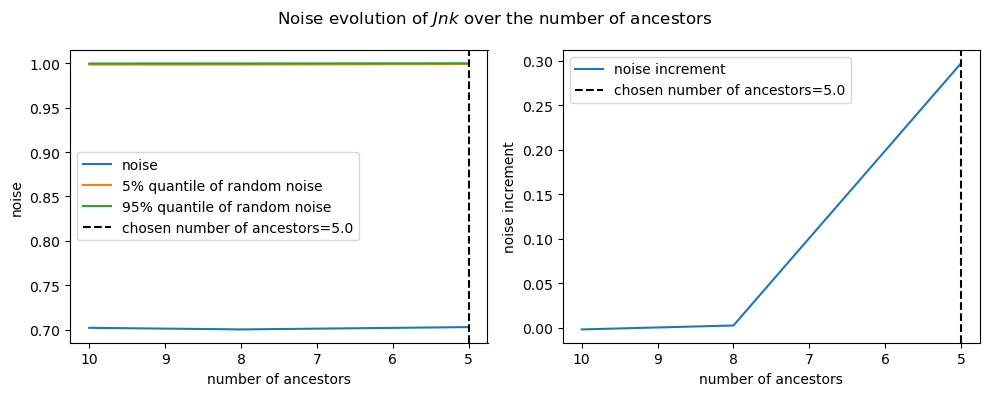

Ancestors of $Jnk$: ['$Plcg$', '$PIP2$', '$PIP3$', '$PKC$', '$P38$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 2/2 [00:10<00:00,  5.04s/it]



Results for $Plcg$
Kernel [linear] has n/(n+s)=0.6401015890665807, Z=(1.00, 1.00), gamma=9.94e+01
Kernel [quadratic] has n/(n+s)=0.5979073933652683, Z=(1.00, 1.00), gamma=1.31e+03
Kernel [gaussian] has n/(n+s)=0.43961531142883725, Z=(0.98, 0.99), gamma=7.46e+02
$Plcg$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.54 after pruning)


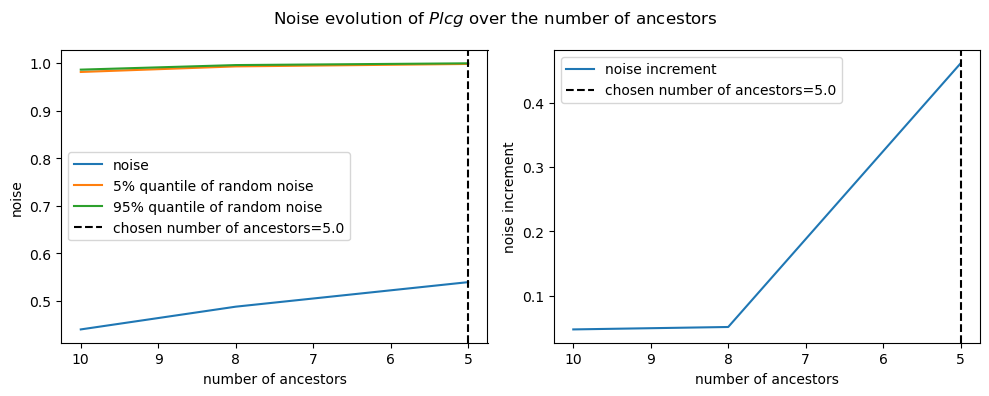

Ancestors of $Plcg$: ['$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$']


Results for $PIP3$
Kernel [linear] has n/(n+s)=0.9806566658698262, Z=(1.00, 1.00), gamma=2.60e+01
Kernel [quadratic] has n/(n+s)=0.9698658634175131, Z=(0.99, 1.00), gamma=3.61e+01
Kernel [gaussian] has n/(n+s)=0.8818099958019664, Z=(0.89, 0.91), gamma=4.71e-03
$PIP3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.94 after pruning)


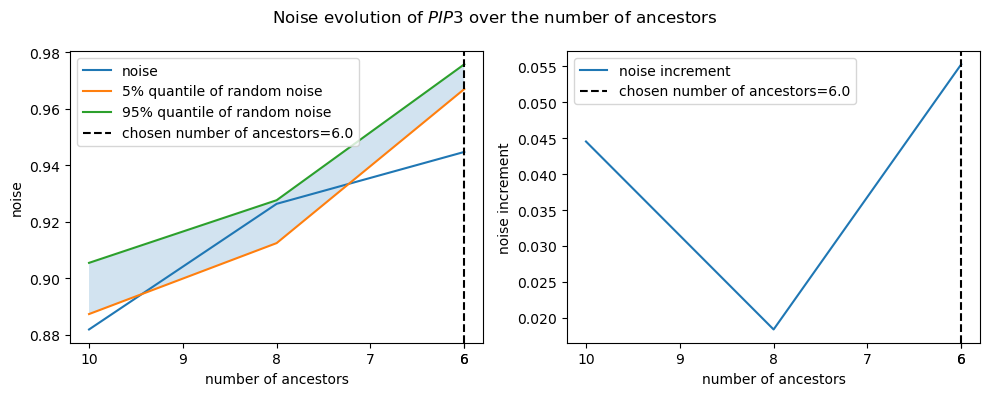

Ancestors of $PIP3$: ['$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']


Results for $Erk$
Kernel [linear] has n/(n+s)=0.8311959077199224, Z=(1.00, 1.00), gamma=1.02e+02
Kernel [quadratic] has n/(n+s)=0.778013816697185, Z=(1.00, 1.00), gamma=1.81e+03
Kernel [gaussian] has n/(n+s)=0.4840870048780909, Z=(0.95, 0.96), gamma=3.29e+01
$Erk$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.63 after pruning)


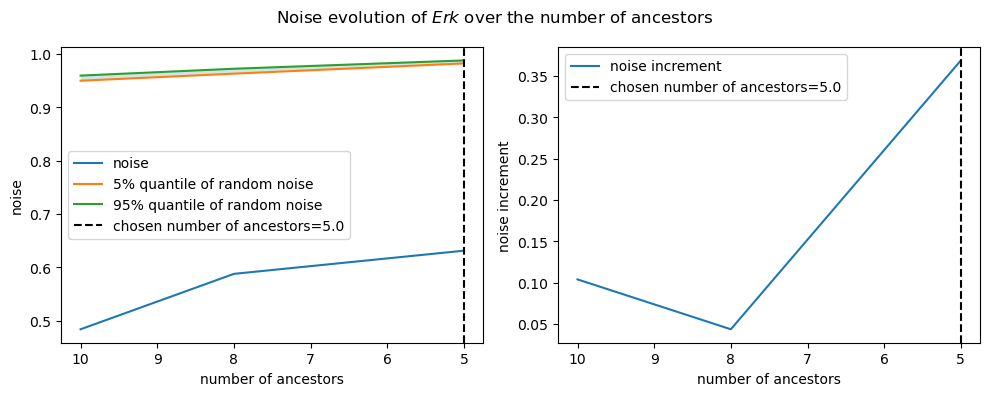

Ancestors of $Erk$: ['$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']


Results for $Akt$
Kernel [linear] has n/(n+s)=0.7608266895218255, Z=(1.00, 1.00), gamma=2.04e+02
Kernel [quadratic] has n/(n+s)=0.6458105661803061, Z=(1.00, 1.00), gamma=2.98e+01
Kernel [gaussian] has n/(n+s)=0.42504200296877503, Z=(0.95, 0.96), gamma=5.41e+01
$Akt$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.63 after pruning)


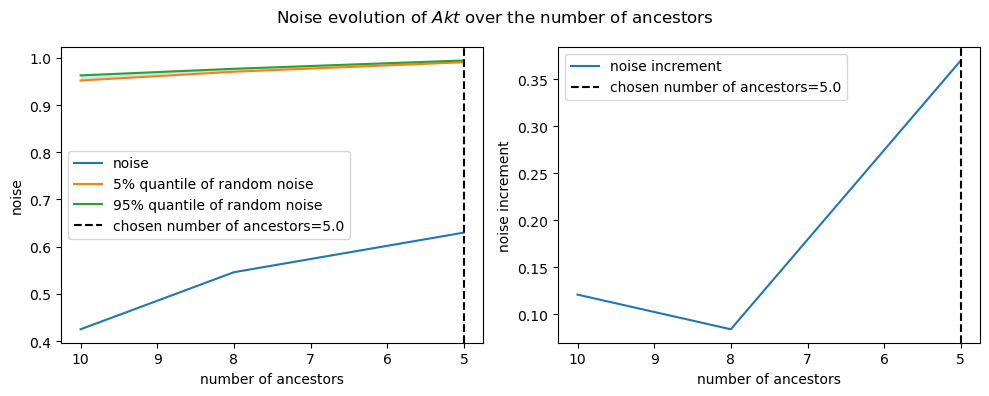

Ancestors of $Akt$: ['$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$PKA$']


Results for $PKA$
Kernel [linear] has n/(n+s)=0.9722248385047936, Z=(1.00, 1.00), gamma=3.38e+02
Kernel [quadratic] has n/(n+s)=0.9344086390014696, Z=(1.00, 1.00), gamma=5.22e+01
Kernel [gaussian] has n/(n+s)=0.8387857659496257, Z=(0.89, 0.91), gamma=2.00e-03
$PKA$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.91 after pruning)


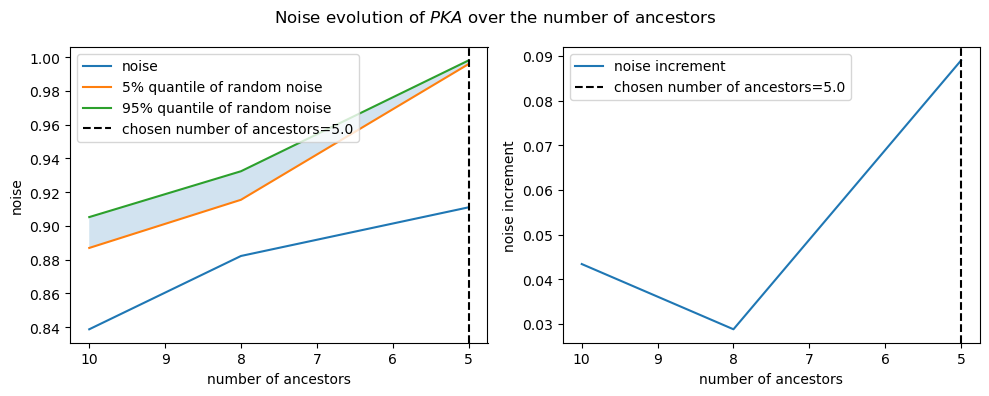

Ancestors of $PKA$: ['$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$']



In [9]:
graph_discovery_with_clusters.fit()

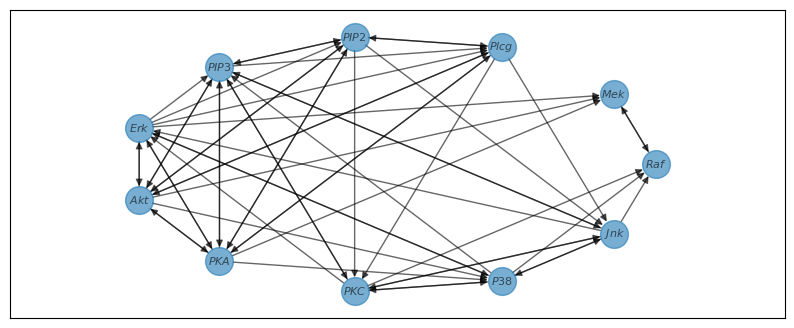

In [10]:
graph_discovery_with_clusters.plot_graph()